In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)

In [2]:
# Borrar columnas innecesarias
# describe()
# Max, min, std
alt = pd.read_csv("alturas.csv")

In [5]:
alt.head()
alt.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

In [6]:
alt.describe()

esp           por           swe           fra
count  10000.000000  10000.000000  10000.000000  10000.000000
mean     170.120040    164.585743    182.446293    170.059354
std       19.915349     24.710109     24.919607     20.280489
min       96.737075     78.860028     86.022559     78.806492
25%      156.657101    147.925539    165.320591    156.544134
50%      170.377533    164.534573    182.654178    169.837293
75%      183.614256    181.044152    199.405632    183.697008
max      259.036674    257.490308    274.217179    255.856842

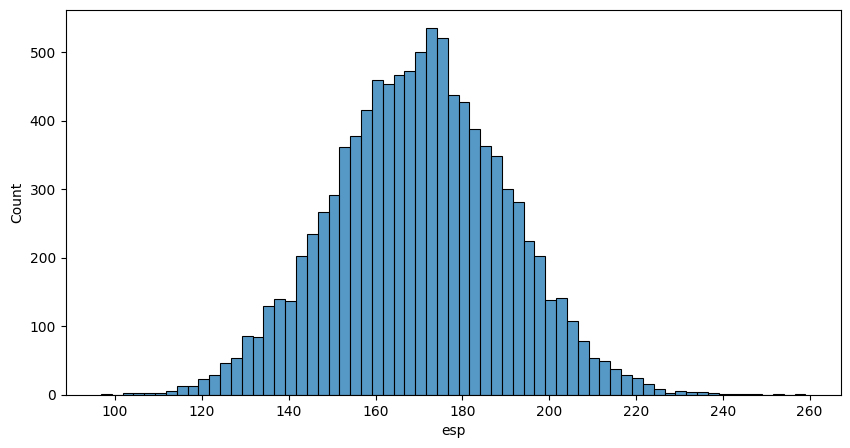

In [6]:
plt.figure(figsize=(10,5))
sns.histplot(alt['esp']);


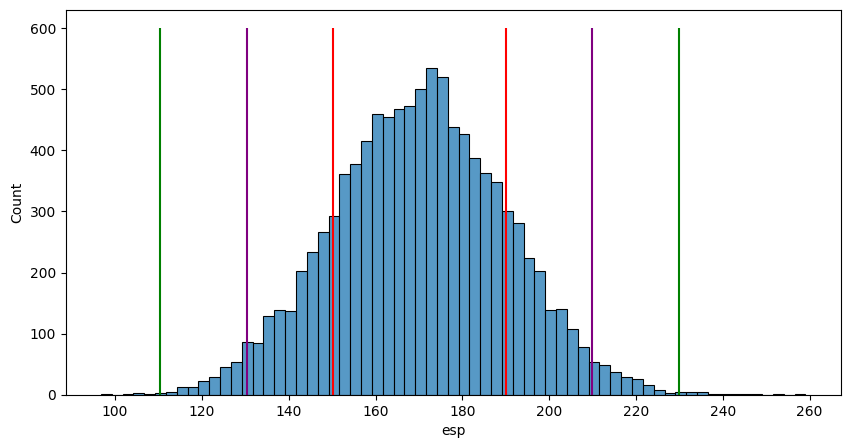

In [12]:
fig = plt.figure(figsize=(10,5))
sns.histplot(alt['esp']); # esp por swe fra

colores = ['r', 'purple', 'green']
for i, j in enumerate(colores):
    plt.vlines(alt['esp'].mean()+(i + 1)*alt['esp'].std(), 0, 600, colors=j)
    plt.vlines(alt['esp'].mean()-(i + 1)*alt['esp'].std(), 0, 600,colors=j)




![imagen](normal.jpg)

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(alt['esp']);

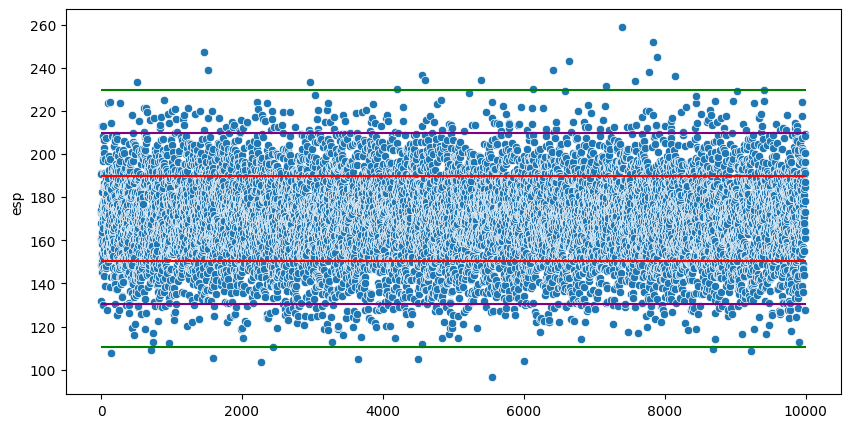

In [13]:
plt.figure(figsize=(10,5))
sns.scatterplot(alt['esp']);

colores = ['r', 'purple', 'g']

for i in range(3):
    plt.hlines(alt['esp'].mean()+(i + 1)*alt['esp'].std(), 0, 10000, colors=colores[i])
    plt.hlines(alt['esp'].mean()-(i + 1)*alt['esp'].std(), 0, 10000,colors=colores[i])


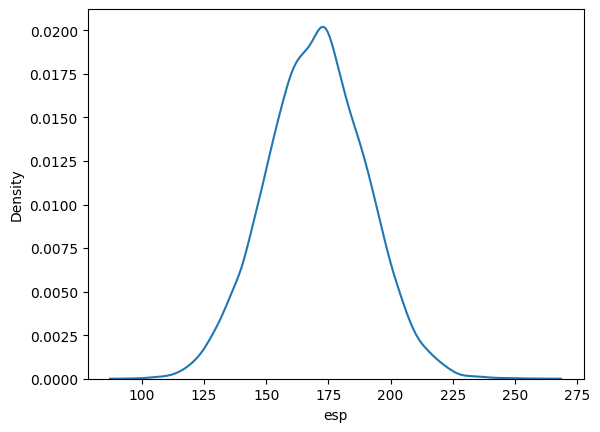

In [14]:
sns.kdeplot(alt['esp']);

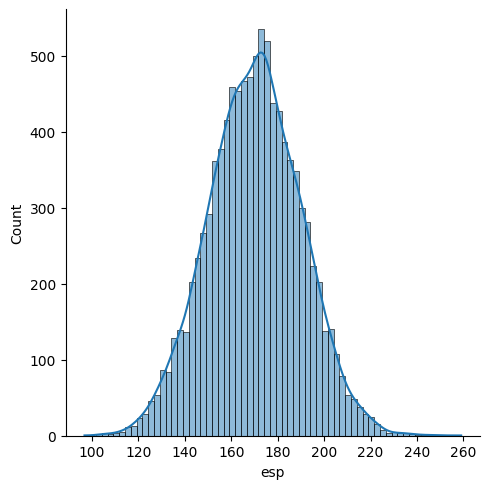

In [15]:
sns.displot(data=alt, x="esp", kde=True)

C:\Users\pabma\AppData\Local\Temp\ipykernel_33720\2857856248.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(alt['esp'], shade=True);


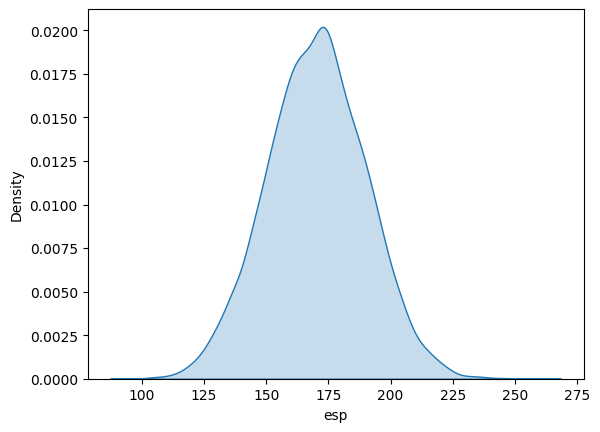

In [16]:
sns.kdeplot(alt['esp'], shade=True);

In [90]:
# Supongamos que en lugar de conseguir la altura de las 10.000 personas solo tenemos una muestra de 10, 30, 50, 300 personas... (muestra)
# ¿Cómo podemos estimar la media y varianza de ese grupo de 10.000 personas (población) 
# Varianza a "mano" vs .std
#np.random.seed(42)
errores = []

for _ in range(1000):
    media_muestra = alt['esp'].sample(50).mean()
    media_global = alt['esp'].mean()
    error = abs(media_muestra - media_global)
    errores.append(error)

errores = pd.DataFrame(errores)
errores.mean()

0    2.272897
dtype: float64

In [118]:
samples = []

for i in range(1000):
    muestra = alt['esp'].sample(50)
    min_max = (abs(muestra.max() + muestra.min()))/2
    error = abs(min_max - alt['esp'].mean())
    samples.append(error)

np.array(samples).mean()

5.272806458553805

In [18]:
np.random.seed(1100)
from scipy.stats import ttest_1samp
ttest_1samp([197, 191], alt['esp'].mean())

TtestResult(statistic=7.959986649118055, pvalue=0.07956068457878385, df=1)

In [19]:
from scipy.stats import ttest_ind
ttest_ind(alt['swe'], alt['por'],  equal_var=False)

TtestResult(statistic=50.89371770735865, pvalue=0.0, df=19996.57479707426)